## Description:
               The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
#ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("E:\Machine Learning\data sets\diabetes.csv")  #read the dataset
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


# Dataset Details

    *Pregnancies: Number of times pregnant
    *Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
    *BloodPressure: Diastolic blood pressure (mm Hg)
    *SkinThickness: Triceps skin fold thickness (mm)
    *Insulin: 2-Hour serum insulin (mu U/ml)
    *BMI: Body mass index (weight in kg/(height in m)2)
    *DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of          diabetes based on family history)
    *Age: Age (years)
    *Outcome: Class variable (0 = non-diabetic, 1 = diabetic)

In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Note the Minimum value in Above table.Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction 
those minimum values are Zero.No chance to these features are in Zero. Zero values are missing values.

### Filling the Missing values

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#first replace the Zero values as NaN
#fill the Nan with mean value of the feature
for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']:
    df[i] = df[i].replace(0,np.nan)
    df[i] = df[i].fillna(df[i].mean())
    

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploratry of the data

In [10]:
df.corr()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


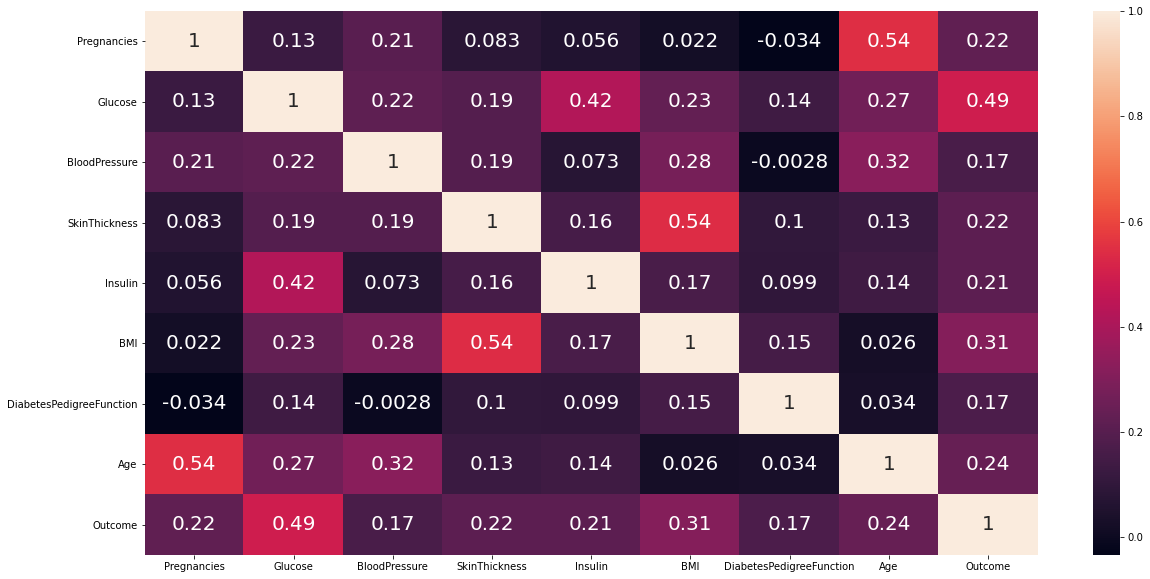

In [11]:
plt.figure(figsize=(20,10))     #relation Between all features
sns.heatmap(df.corr(),annot=True,annot_kws={"size":20})

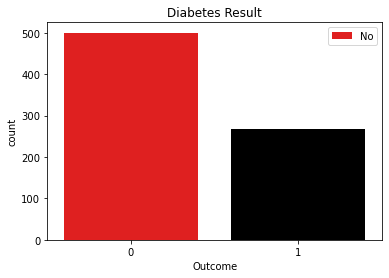

In [12]:
sns.countplot(df.Outcome,palette=["r","black"])
plt.legend(["No"])
plt.title("Diabetes Result")
plt.show()

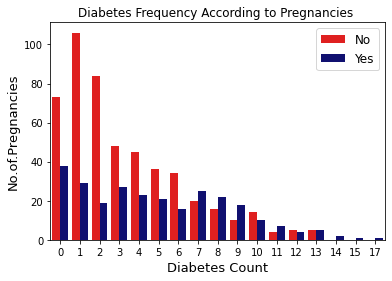

In [13]:
sns.countplot(df.Pregnancies,hue=df.Outcome,palette=["red","navy"])
plt.legend(["No","Yes"],loc="upper right",fontsize=12)
plt.title("Diabetes Frequency According to Pregnancies ")
plt.xlabel("Diabetes Count",fontsize=13)
plt.ylabel("No.of.Pregnancies",fontsize=13)
plt.show()

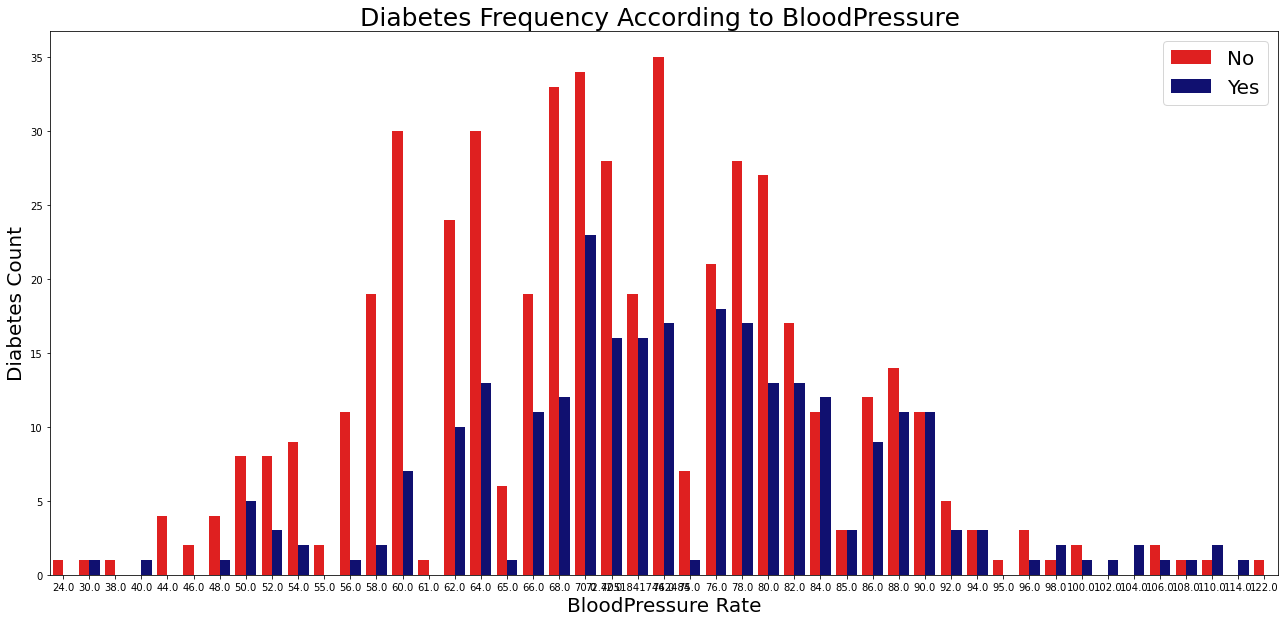

In [14]:
plt.figure(figsize=(22,10))
sns.countplot(df.BloodPressure,hue=df.Outcome,palette=["red","navy"])
plt.legend(["No","Yes"],fontsize=20,loc="upper right")
plt.title("Diabetes Frequency According to BloodPressure ",fontsize=25)
plt.ylabel("Diabetes Count",fontsize=20)
plt.xlabel("BloodPressure Rate",fontsize=20)
plt.show()

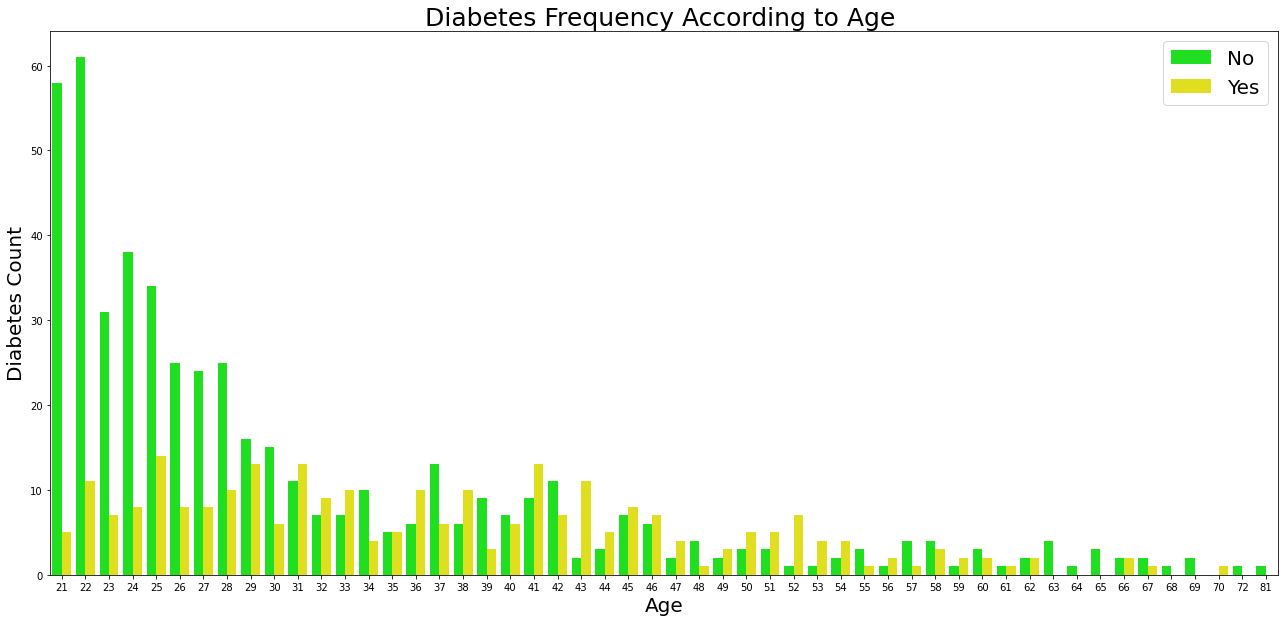

In [15]:
plt.figure(figsize=(22,10))
sns.countplot(df.Age,hue=df.Outcome,palette=["lime","yellow"])
plt.legend(["No","Yes"],fontsize=20,loc="upper right")
plt.title("Diabetes Frequency According to Age ",fontsize=25)
plt.ylabel("Diabetes Count",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.show()

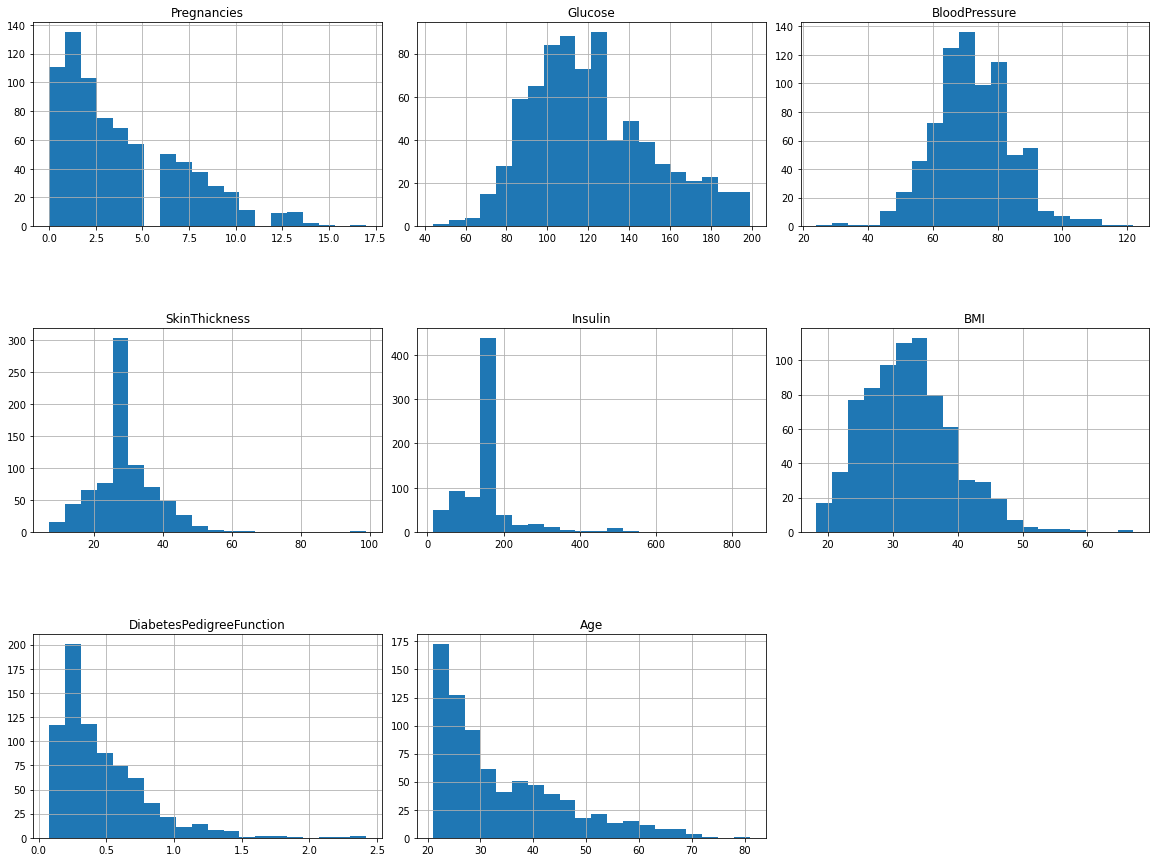

In [16]:
col = df.columns[:8]               #Histogram for all features
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in zip(col, range(length)):
    plt.subplot(3,3,j+1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

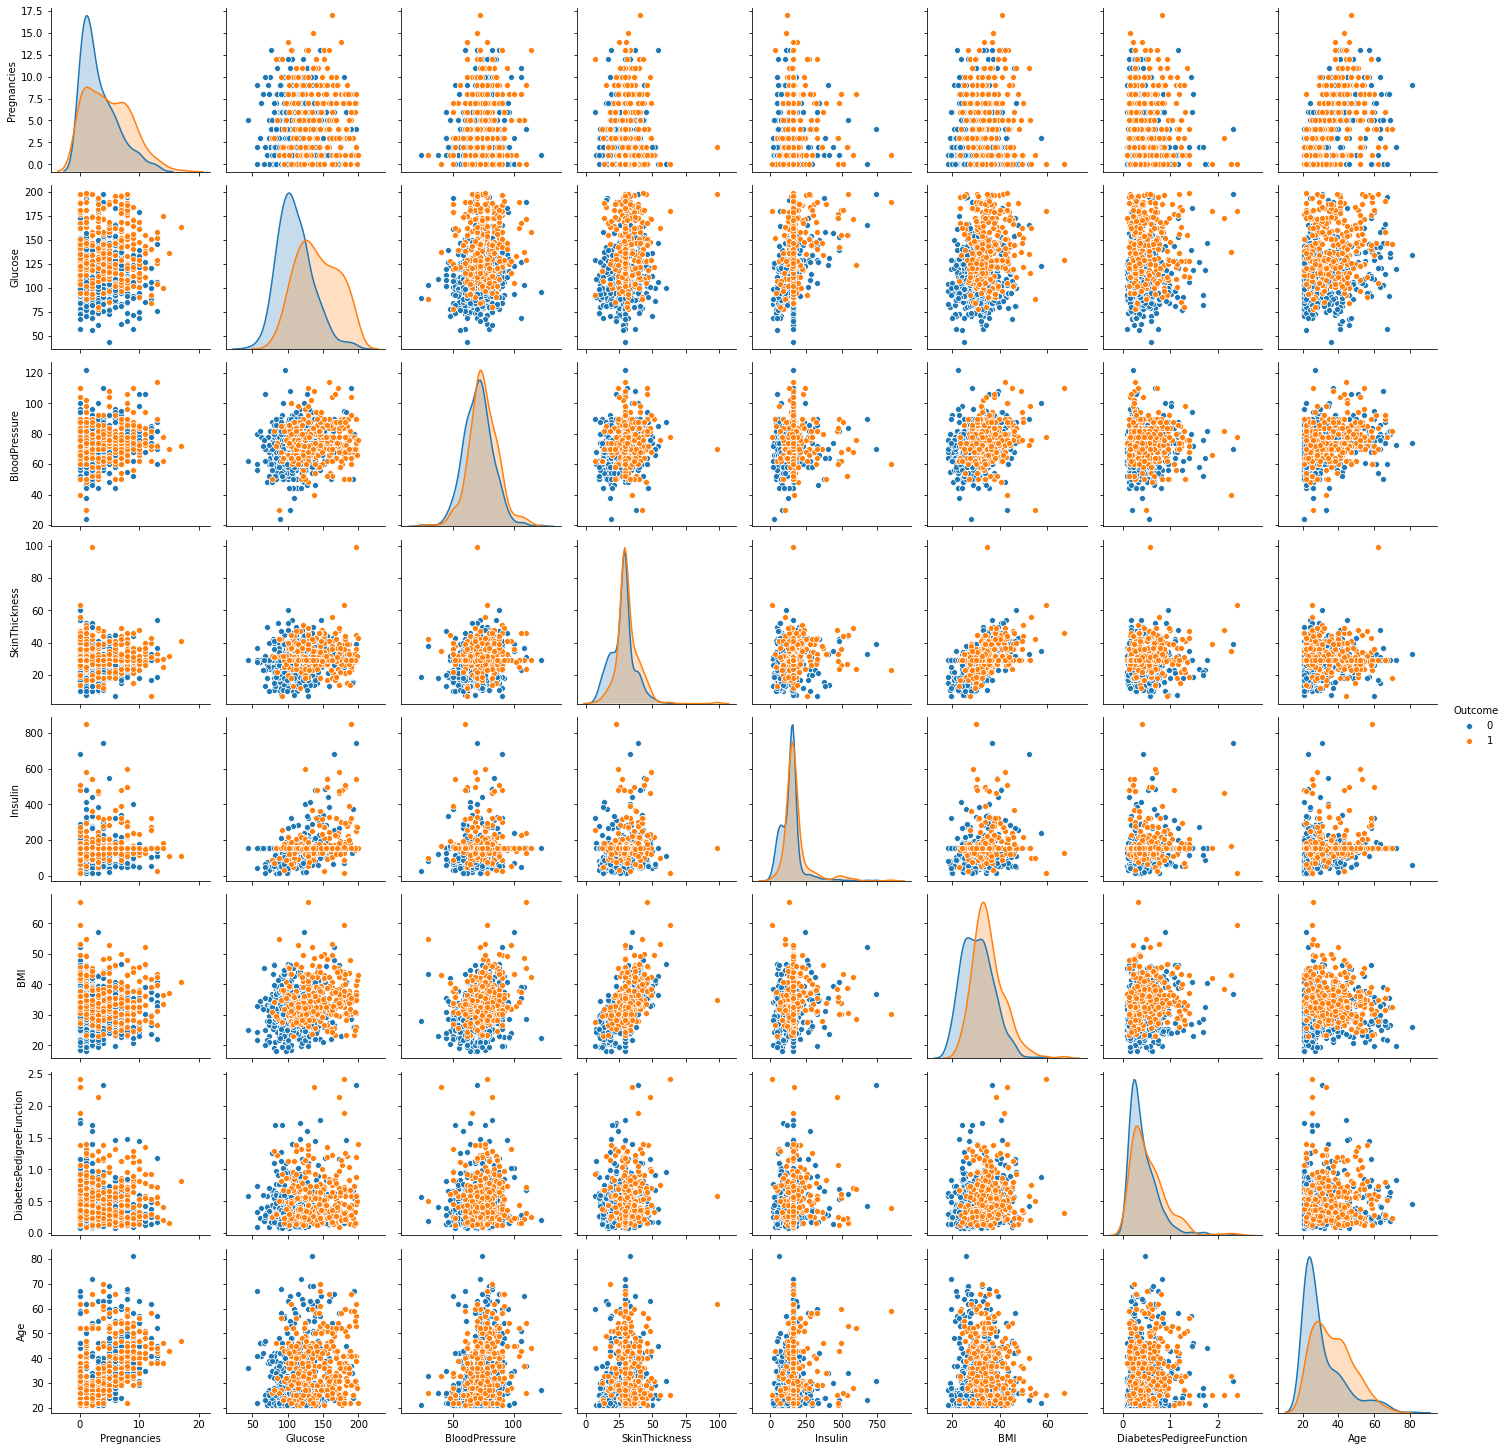

In [17]:
sns.pairplot(data= df,hue="Outcome")     #Spread of the data 
plt.show()

## Model Evaluation

In [18]:
x= df.iloc[:,:-1]
y = df.iloc[:,-1] 

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)   

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


### Random Forest Classifier 

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=190,random_state=0,max_depth=10,
                              min_samples_leaf=3,
                              min_samples_split=2)

In [23]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=190,
                       random_state=0)

In [24]:
y_rf_pre = rf.predict(x_test)
print("Testing Accuracy Rate : {:.2f} %".format((metrics.accuracy_score(y_test,y_rf_pre))*100))

Testing Accuracy Rate : 83.77 %


In [25]:
y_train_pre = rf.predict(x_train)
print("Training Accuracy Rate : {:.2f} %".format((metrics.accuracy_score(y_train,y_train_pre))*100))

Training Accuracy Rate : 92.35 %


Try Grid search method used to find the values for Parameters of RandomforestClassifier

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {
    'max_depth': list(range(5, 25)),
    'min_samples_split': list(range(4, 11)),
    'min_samples_leaf': list(range(4, 11))}
rf_new = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1)
rf_new.fit(x,y)
rf_new.best_params_

{'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 6}

In [98]:
rf_new = RandomForestClassifier(n_estimators=800,random_state=0,max_depth=14,
                              min_samples_leaf=4,
                              min_samples_split=6)

In [99]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(max_depth=14, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=800, random_state=0)

In [100]:
y_rf = rf_new.predict(x_test)
print("Testing Accuracy Rate : {:.2f} %".format((metrics.accuracy_score(y_test,y_rf))*100))

Testing Accuracy Rate : 83.77 %


In [101]:
y_train_pre2 = rf_new.predict(x_train)
print("Training Accuracy Rate : {:.2f} %".format((metrics.accuracy_score(y_train,y_train_pre2))*100))

Training Accuracy Rate : 91.69 %


In [102]:
cv_rf = cross_val_score(rf,x,y,cv=5)  #cross validation
print("Cross Validation Score for Random Forest {:.2f} %".format((cv_rf.mean())*100))

Cross Validation Score for Random Forest 76.05 %


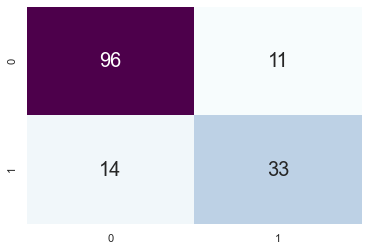

In [103]:
cm_rf = metrics.confusion_matrix(y_test,y_rf_pre)
sns.heatmap(cm_rf,cmap="BuPu",annot=True,cbar=False,annot_kws={"size":20})

### Ada Boost Classifier

In [34]:
from sklearn.ensemble import AdaBoostClassifier  #this is ensemble techinic

In [35]:
abc = AdaBoostClassifier(n_estimators=200)

In [36]:
abc.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=200)

In [37]:
y_abc_pre = abc.predict(x_test)
print("Testing Accuracy rate for Ada Boost Classifier : {:.2f} %".format((metrics.accuracy_score(y_test,y_abc_pre))*100))

Testing Accuracy rate for Ada Boost Classifier : 80.52 %


In [38]:
print("Training Accuracy rate for Ada Boost Classifier : {:.2f} %".format((metrics.accuracy_score(y_train,abc.predict(x_train)))*100))

Training Accuracy rate for Ada Boost Classifier : 88.11 %


In [39]:
cv_abc = cross_val_score(abc,x,y,cv=5)
print("Cross Validation Score for Random Forest : {:.2f} %".format((cv_abc.mean())*100))

Cross Validation Score for Random Forest : 75.52 %


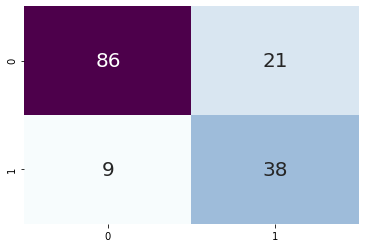

In [40]:
cm_abc = metrics.confusion_matrix(y_test,y_abc_pre)   #confusion matrix for ada boost classifier
sns.heatmap(cm_abc,cmap="BuPu",annot=True,cbar=False,annot_kws={"size":20})

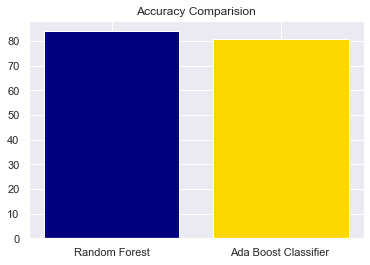

In [41]:
compare = {"Random Forest":round((metrics.accuracy_score(y_test,y_rf_pre))*100),     
          "Ada Boost Classifier ":round((metrics.accuracy_score(y_test,y_abc_pre))*100)}

sns.set(style="darkgrid")
plt.bar(compare.keys(),compare.values(),color=["navy","gold"])
plt.title("Accuracy Comparision")
plt.show()

In [42]:
compare

{'Random Forest': 84.0, 'Ada Boost Classifier ': 81.0}

## Random forest classifier is performed well compared to Ada boost classifier 